### 210. Course Schedule II

In [ ]:
############################### Improvement Table ###########################################
"""
Repitition # -  Time Taken   
1st Repitition - 40 mins had the idea on point, but implementation sucked, with a lot of help

"""

### Model Answer

### 1st Repitition

In [ ]:
"""
UMPIRE

U: we are given a list of list, which contains pairs [i, j]
which tells us that to take course 'i' we have to take course 'j' 
our job is to return the list which tells the ordering of the courses to 
be taken 

M: Dynamic Programming + converting list of list into a course : pre dictionaryu

running time - O( V + E )
space time - O( V + E)

P:
1. create a dictionary representation of the list of pair
2. traverse through the dictionary, if at any point an cycle is detected 
    return empty array '[]'
    otherwise return the ordering of courses to be taken

Q1. how to detect a cycle ?
A1. we will have temperoray list, which contains courses which are being
currently verfified if they can be taken. And if the current course is in
the dictionary return []
"""

class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        graph = defaultdict(list)

        for i, j in prerequisites:
            graph[i].append(j)

        result = []
        # stores the odering of courses to be taken

        courseState = [0] * numCourses
        # 0 - univisited, 1 - visiting, 2 - visited
        cycle = False

        def dfs(course):
            nonlocal cycle
            if courseState[course] == 1:
                # we detected a cycle
                cycle = True
                return
            
            if courseState[course] == 2:
                # Already visisted course
                return
            
            courseState[course] = 1

            for i in graph[course]:
                if not cycle:
                    dfs(i)

            courseState[course] = 2
            result.append(course)

        for course in range(numCourses):
            if courseState[course] == 0:
                dfs(course)
            if cycle:
                return []
            
        return result




### 2nd Repition - 10/5/2024

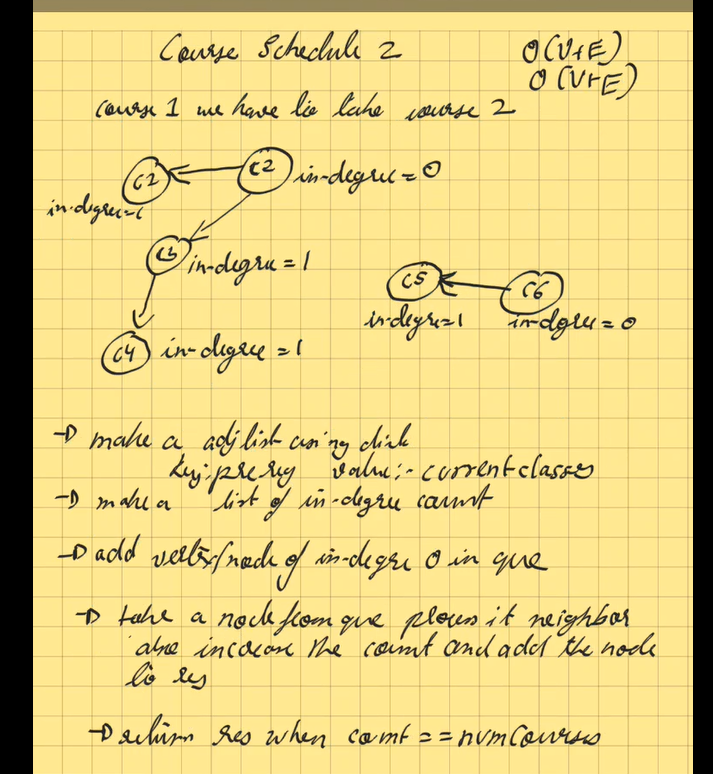

In [ ]:
class Solution:
    def findOrder(self, numCourses: int, prerequisites: List[List[int]]) -> List[int]:
        adjList = defaultdict(list)
        inDegree = defaultdict(int)

        for crs, pre in prerequisites:
            adjList[pre].append(crs)
            inDegree[crs] += 1

        que = [] # our Queue
        res = [] # our order to take all courese
        count = 0 # keeps records of all good to take courese

        for i in range(numCourses):
            if inDegree[i] == 0:
                que.append(i)  

        while (que):
            curCourse = que.pop(0)
            count += 1
            res.append(curCourse)

            for nei in adjList[curCourse]:
                inDegree[nei] -= 1
                if inDegree[nei] == 0:
                    que.append(nei)

        if count == numCourses:
            return res

        return []     